<a href="https://colab.research.google.com/github/shivakumar17/hotel-booking/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [4]:
#Importing usefull librories
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Importing the data
df=pd.read_csv('/content/drive/MyDrive/hotel booking/Copy of Hotel Bookings.csv')

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#<b> Data cleaning

In [10]:
#checking duplicate values
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(87396, 32)

After droping duplicate valued the number of rows are reduced to 87396 from 119390

In [12]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


##The columns children, country, agent, company have null values.

In [13]:
#percentage of null values in each column
df[['children', 'country', 'agent', 'company']].isnull().sum()/len(df)

children    0.000046
country     0.005172
agent       0.139514
company     0.939826
dtype: float64

###The percentage of null values in column company has very high. As we donot have enough data to analyse on company, we can neglect the column company. 


In [14]:
df.drop(columns='company',inplace=True)

In [15]:
## For the missing values in the country column, replace it with mode (value that appears most often)
df['country'].fillna(df.country.mode().to_string(), inplace=True)
 
## for missing children value, replace it with rounded mean value
df['children'].fillna(round(df.children.mean()), inplace=True)

In [16]:
sorted(df.agent.unique())

[nan,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 44.0,
 45.0,
 47.0,
 50.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 63.0,
 64.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 77.0,
 78.0,
 79.0,
 81.0,
 82.0,
 83.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 98.0,
 99.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 110.0,
 111.0,
 112.0,
 114.0,
 115.0,
 117.0,
 118.0,
 119.0,
 121.0,
 122.0,
 126.0,
 127.0,
 128.0,
 129.0,
 132.0,
 133.0,
 134.0,
 135.0,
 138.0,
 139.0,
 141.0,
 142.0,
 143.0,
 144.0,
 146.0,
 147.0,
 148.0,
 149.0,
 150.0,
 151.0,
 152.0,
 153.0,
 154.0,
 155.0,
 156.0,
 157.0,
 158.0,
 159.0,
 162.0,
 163.0,
 165.0,
 167.0,
 168.0,
 170.0,
 1

###As the column agent represent the ID of each agent staring from 1 to 535, we cannot replace this null values with mean or median as these are categorical. So i am replacing the null values with new ID 0

In [17]:
df['agent'] = df['agent'].fillna(0.0)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

There are no null values

#Best time of year to book a hotel room

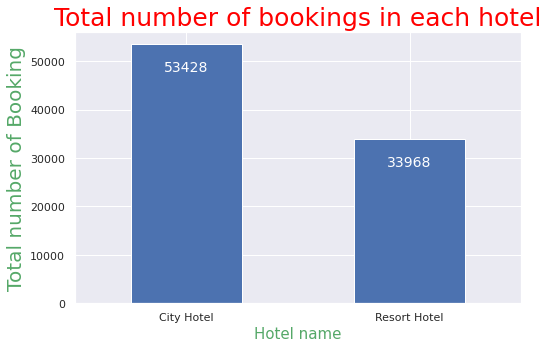

In [19]:
## Total booking in each Hotel
sns.set_theme(style="darkgrid")
ax=df['hotel'].value_counts().plot.bar(rot=0,figsize=(8,5))
ax.set_xlabel('Hotel name',{'fontsize':15,'color':'g'})
ax.set_ylabel('Total number of Booking',{'fontsize':20,'color':'g'})
ax.set_title("Total number of bookings in each hotel",{'fontsize':25,'color':'red'})
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='top', color='white', size=14)

The number of bookings in City Hotel is higher than Resort Hotel

In [20]:
df['total_nights']=df['stays_in_weekend_nights']+df['stays_in_week_nights']

In [21]:
weekend_nights_2015=df[df['arrival_date_year']==2015].groupby(['arrival_date_month'])['stays_in_weekend_nights'].sum()
week_nights_2015=df[df['arrival_date_year']==2015].groupby(['arrival_date_month'])['stays_in_week_nights'].sum()
total_2015=df[df['arrival_date_year']==2015].groupby(['arrival_date_month'])['total_nights'].sum()

In [22]:
weekend_nights_2016=df[df['arrival_date_year']==2016].groupby(['arrival_date_month'])['stays_in_weekend_nights'].sum()
week_nights_2016=df[df['arrival_date_year']==2016].groupby(['arrival_date_month'])['stays_in_week_nights'].sum()
total_2016=df[df['arrival_date_year']==2016].groupby(['arrival_date_month'])['total_nights'].sum()

In [23]:
weekend_nights_2017=df[df['arrival_date_year']==2017].groupby(['arrival_date_month'])['stays_in_weekend_nights'].sum()
week_nights_2017=df[df['arrival_date_year']==2017].groupby(['arrival_date_month'])['stays_in_week_nights'].sum()
total_2017=df[df['arrival_date_year']==2017].groupby(['arrival_date_month'])['total_nights'].sum()

Text(0.5, 1.0, 'Total nights booked in every month in 2017')

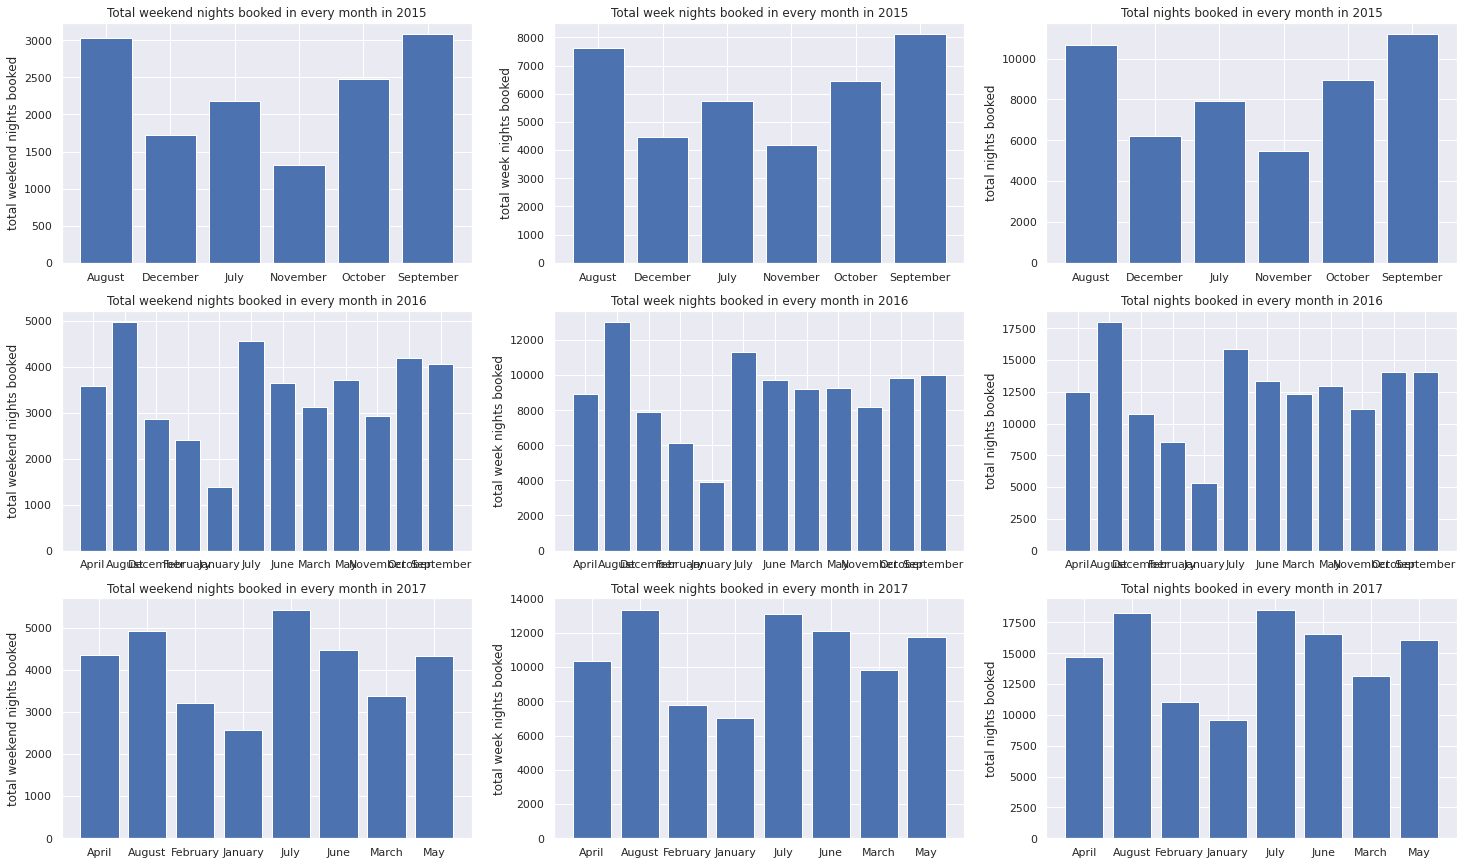

In [24]:
plt.figure(figsize=(25,15))
plt.subplot(3,3,1)
plt.bar(weekend_nights_2015.index,height=weekend_nights_2015)
#plt.xlabel('months')
plt.ylabel('total weekend nights booked')
plt.title('Total weekend nights booked in every month in 2015')

plt.subplot(3,3,2)
plt.bar(week_nights_2015.index,height=week_nights_2015)
#plt.xlabel('months')
plt.ylabel('total week nights booked')
plt.title('Total week nights booked in every month in 2015')

plt.subplot(3,3,3)
plt.bar(total_2015.index,height=total_2015)
#plt.xlabel('months')
plt.ylabel('total nights booked')
plt.title('Total nights booked in every month in 2015')


plt.subplot(3,3,4)
plt.bar(weekend_nights_2016.index,height=weekend_nights_2016)
#plt.xlabel('months')
plt.ylabel('total weekend nights booked')
plt.title('Total weekend nights booked in every month in 2016')


plt.subplot(3,3,5)
plt.bar(week_nights_2016.index,height=week_nights_2016)
#plt.xlabel('months')
plt.ylabel('total week nights booked')
plt.title('Total week nights booked in every month in 2016')


plt.subplot(3,3,6)
plt.bar(total_2016.index,height=total_2016)
#plt.xlabel('months')
plt.ylabel('total nights booked')
plt.title('Total nights booked in every month in 2016')


plt.subplot(3,3,7)
plt.bar(weekend_nights_2017.index,height=weekend_nights_2017)
#plt.xlabel('months')
plt.ylabel('total weekend nights booked')
plt.title('Total weekend nights booked in every month in 2017')

plt.subplot(3,3,8)
plt.bar(week_nights_2017.index,height=week_nights_2017)
#plt.xlabel('months')
plt.ylabel('total week nights booked')
plt.title('Total week nights booked in every month in 2017')

plt.subplot(3,3,9)
plt.bar(total_2017.index,height=total_2017)
#plt.xlabel('months')
plt.ylabel('total nights booked')
plt.title('Total nights booked in every month in 2017')


We can see the trend of hotel booking in each month for every year in week, weekend and total nights.Every year total night booking were increase gradually.


In [25]:
cancel=df.groupby(['hotel'])['is_canceled'].value_counts()
cancel

hotel         is_canceled
City Hotel    0              37379
              1              16049
Resort Hotel  0              25992
              1               7976
Name: is_canceled, dtype: int64

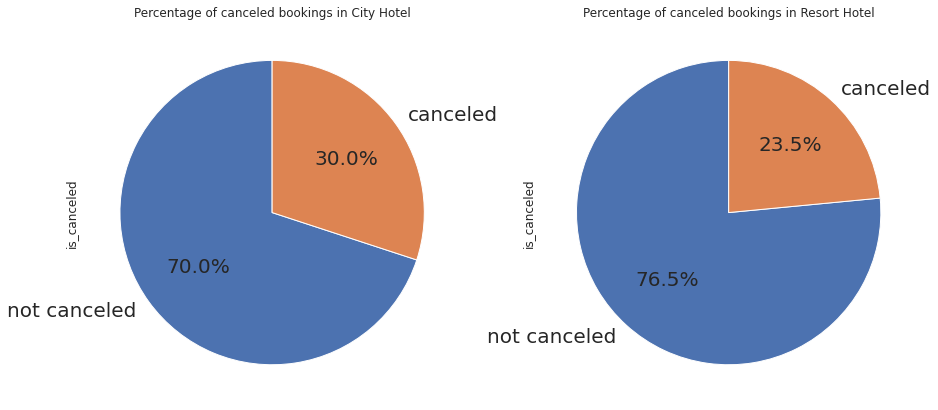

In [26]:
plt.subplot(1,2,1)
cancel['City Hotel'].plot.pie(figsize = (15,10),autopct='%1.1f%%',startangle=90, textprops={'fontsize': 20}, title = 'Percentage of canceled bookings in City Hotel',labels=['not canceled','canceled'])
plt.subplot(1,2,2)
cancel['Resort Hotel'].plot.pie(figsize = (15,10),autopct='%1.1f%%',startangle=90, textprops={'fontsize': 20}, title = 'Percentage of canceled bookings in Resort Hotel',labels=['not canceled','canceled'])

Resort hotel has less pecentage of cancelation than City Hotel

#Checking which month wise cancelations percentage

In [27]:
cancel_month=df.groupby(['hotel','arrival_date_month'])['is_canceled'].value_counts(normalize=True)
cancel_month

hotel         arrival_date_month  is_canceled
City Hotel    April               0              0.655512
                                  1              0.344488
              August              0              0.679866
                                  1              0.320134
              December            0              0.674851
                                  1              0.325149
              February            0              0.729542
                                  1              0.270458
              January             0              0.720147
                                  1              0.279853
              July                0              0.669568
                                  1              0.330432
              June                0              0.696104
                                  1              0.303896
              March               0              0.718904
                                  1              0.281096
              May         

In [28]:
x=pd.DataFrame(cancel_month)
x.rename(columns={'is_canceled':'Percentage'},inplace=True)
x.reset_index(inplace=True)

In [29]:
cancel_per=x[(x['is_canceled']==1)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


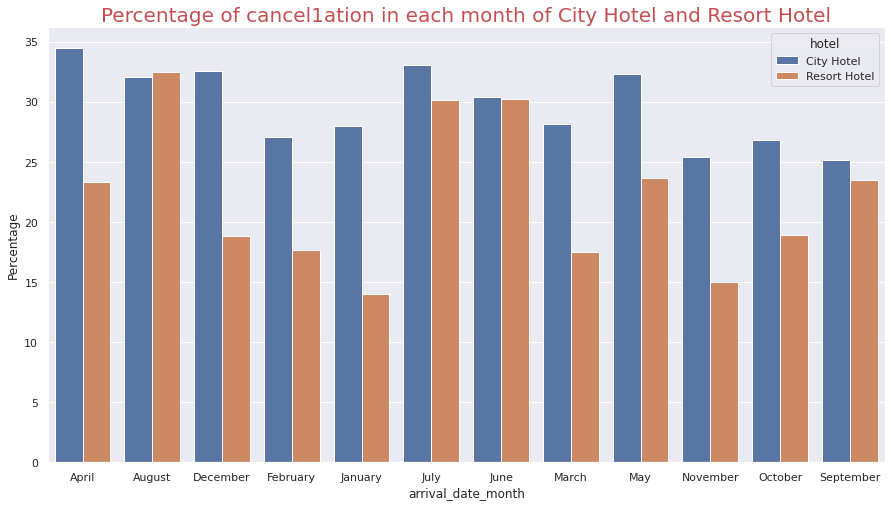

In [30]:
fig=plt.figure(figsize=(15,8))
ax=fig.gca()
sns.barplot(cancel_per['arrival_date_month'],cancel_per['Percentage']*100,hue=cancel_per['hotel'],ax=ax)
ax.set_title('Percentage of cancel1ation in each month of City Hotel and Resort Hotel',fontsize=20,color='r')
plt.show()



In the month of January the cancel percentage is very less for Resort Hotel and in the month of November the cancel percentage is very less for City Hotel

In [31]:
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [32]:
x=df.groupby(['hotel','arrival_date_month'])['days_in_waiting_list'].mean()

In [33]:
waiting=pd.DataFrame(x)
waiting.reset_index(inplace=True)
waiting

,hotel,arrival_date_month,days_in_waiting_list
0,City Hotel,April,1.566142
1,City Hotel,August,0.333333
2,City Hotel,December,0.801924
3,City Hotel,February,0.160055
4,City Hotel,January,1.579487
5,City Hotel,July,0.170439
6,City Hotel,June,0.678921
7,City Hotel,March,0.264621
8,City Hotel,May,1.864770
9,City Hotel,November,0.970768


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


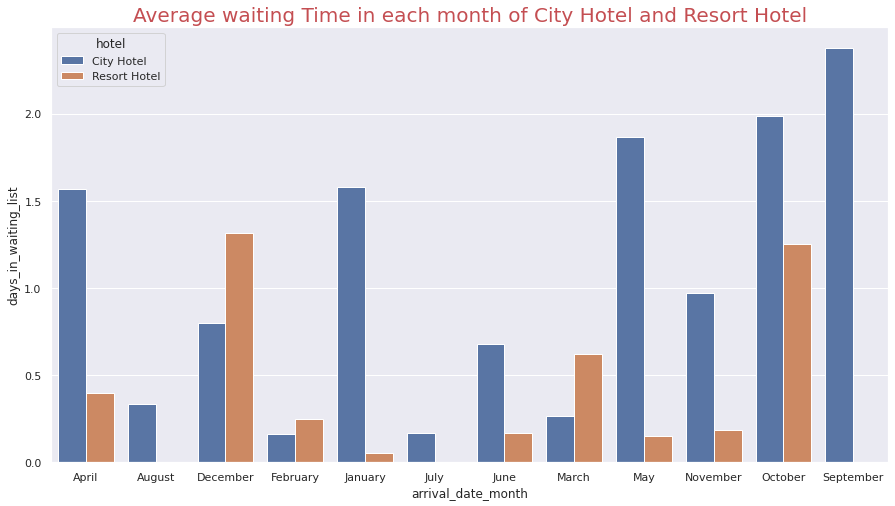

In [34]:
fig=plt.figure(figsize=(15,8))
ax=fig.gca()
sns.barplot(waiting['arrival_date_month'],waiting['days_in_waiting_list'],hue=waiting['hotel'],ax=ax)
ax.set_title('Average waiting Time in each month of City Hotel and Resort Hotel',fontsize=20,color='r')
plt.show()


<b>The average waiting time in the month of January is very less for Resort Hotel and the average waiting time in the month of February is very less for City Hotel 

<b>So the month January is the best month of year to book a Resort hotel room and the month February is the best time to book City hotel as there is less waiting list

#<b>Probability of Hotels to recieve a disproportionately high number of special requests


In [35]:
per_spec_resort=df[df['hotel']=='Resort Hotel']['total_of_special_requests'].sum()/len(df[df['hotel']=='Resort Hotel'])*100
per_spec_resort

67.90214319359397

In [36]:
per_spec_city=df[df['hotel']=='City Hotel']['total_of_special_requests'].sum()/len(df[df['hotel']=='City Hotel'])*100
per_spec_city

71.09942352324624

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


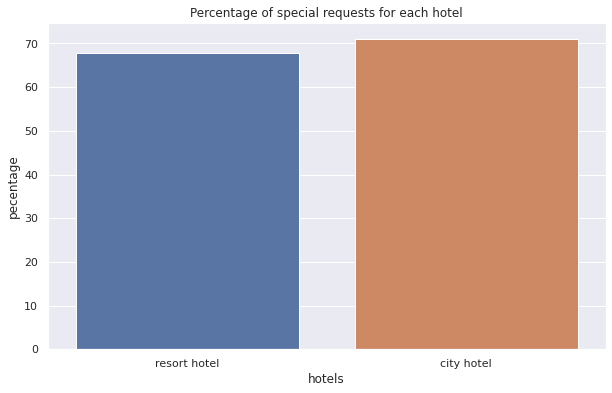

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(['resort hotel','city hotel'],[per_spec_resort,per_spec_city])
plt.xlabel('hotels')
plt.ylabel('pecentage')
plt.title('Percentage of special requests for each hotel')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='top', color='white', size=14)

Probability of recieving special request is high for both the hotels, but the City hotel likely to receive a high number of special requests as its percentage of special requests is 71 

#<b>Optimal length of stay in order to get the best daily rate

##ADR(Average Daily Rate)
ADR is the only variable related to price in this dataset.

average daily rate = 𝑆𝑢𝑚 𝑂𝑓 𝐴𝑙𝑙 𝐿𝑜𝑑𝑔𝑖𝑛𝑔 𝑇𝑟𝑎𝑛𝑠𝑎𝑐𝑡𝑖𝑜𝑛/𝑇𝑜𝑡𝑎𝑙 𝑁𝑢𝑚𝑏𝑒𝑟 𝑂𝑓 𝑆𝑡𝑎𝑦𝑖𝑛𝑔 𝑁𝑖𝑔ℎ𝑡

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


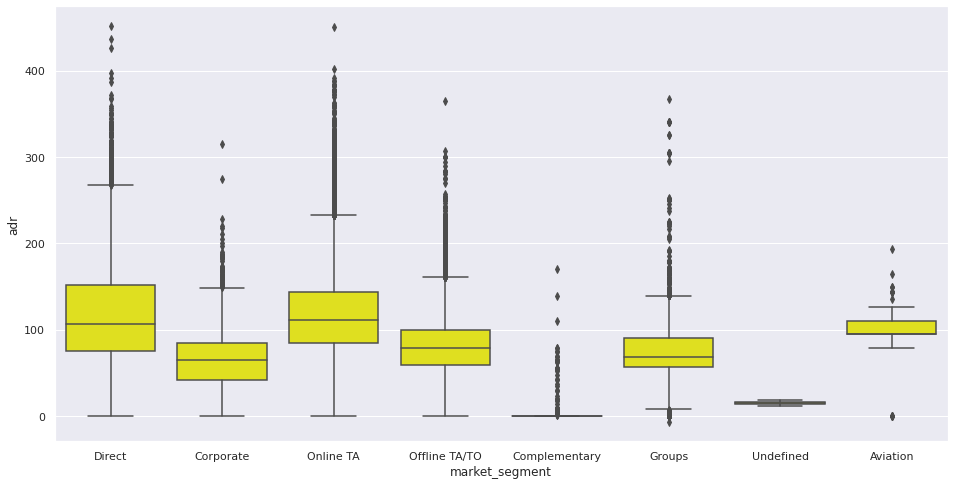

In [38]:
plt.subplots(figsize=(16,8))
df2 = df[df["adr"]<=500]
sns.boxplot(df2['market_segment'],df['adr'],color='yellow')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


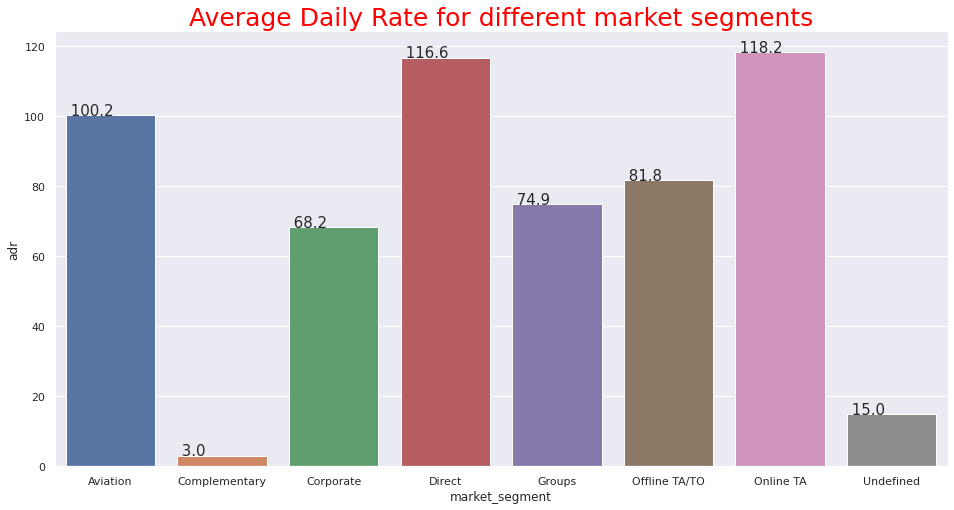

In [39]:
grp1 = df.groupby("market_segment").mean().reset_index()
fig, plot = plt.subplots(figsize=(16,8))
plot = sns.barplot("market_segment","adr", data = grp1)
plot.set_title("Average Daily Rate for different market segments",color='red',fontsize=25)
for p in plot.patches:
  plot.text(p.get_x(),p.get_height(), f" {round(p.get_height(),1)}", fontsize=15)

##price per month of a hotel**
## average daily rate per person = 𝐴𝐷𝑅/𝐴𝑑𝑢𝑙𝑡𝑠+𝐶ℎ𝑖𝑙𝑑𝑟𝑒𝑛

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'average adr for each hotel in every month')

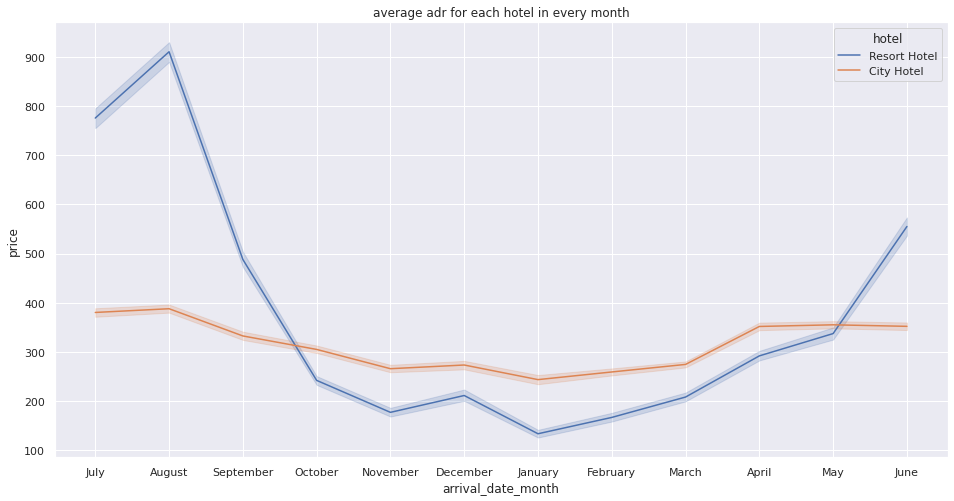

In [40]:
# Calculating average daily rate per person
df['adr_pp'] = df['adr'] / (df['adults'] + df['children']) 
actual_guests =df.loc[df["is_canceled"]==0]
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
# Resizing plot 
plt.figure(figsize=(16,8))
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')
plt.title('average adr for each hotel in every month')

Seasonal effect are present for both hotel but to diffrent degree and with diffrent profiles. For City Hotels the month of April, May and August coincide with the highest adr while the lowest was during the middle of winter((Nov-Jan). Seasonal effects at Resort Hotel are even more pronounced with greater fluctuation in adr throughout the year than the City Hotel and a more defined peak in the month of August and dip during the winter

In [41]:
adr=df.groupby(['total_nights','adults'])['adr'].mean()
adr=pd.DataFrame(adr)
adr.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'adr per day for single adult')

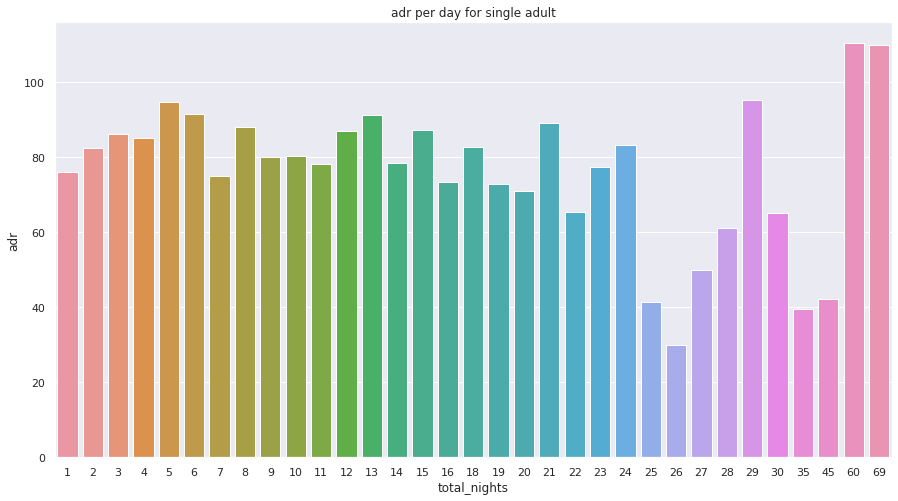

In [42]:
#having only one adult
plt.figure(figsize=(15,8))
k=adr[(adr['adults']==1) & (adr['total_nights']!=0)]
sns.barplot(k['total_nights'],k['adr'])
plt.title('adr per day for single adult')

If we book 26 total nights we may get less adr

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'adr per day for 2 adult')

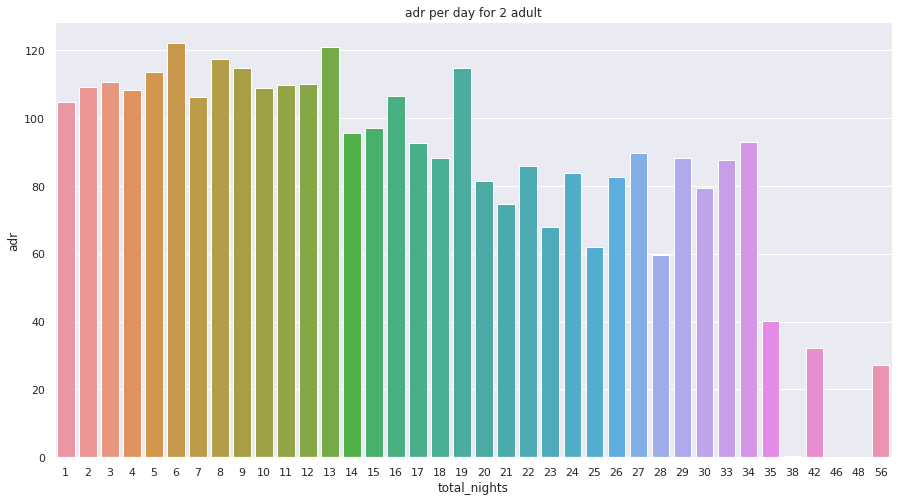

In [43]:
#having two adults
plt.figure(figsize=(15,8))
k=adr[(adr['adults']==2) & (adr['total_nights']!=0)]
sns.barplot(k['total_nights'],k['adr'])
plt.title('adr per day for 2 adult')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'adr per day for 3 adult')

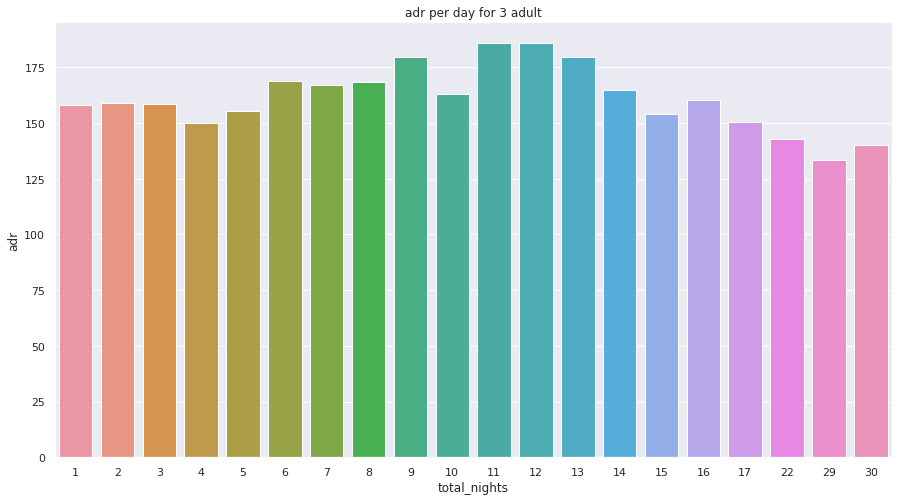

In [44]:
#having 3 adults
plt.figure(figsize=(15,8))
k=adr[(adr['adults']==3) & (adr['total_nights']!=0)]
sns.barplot(k['total_nights'],k['adr'])
plt.title('adr per day for 3 adult')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'adr per day for 4 adult')

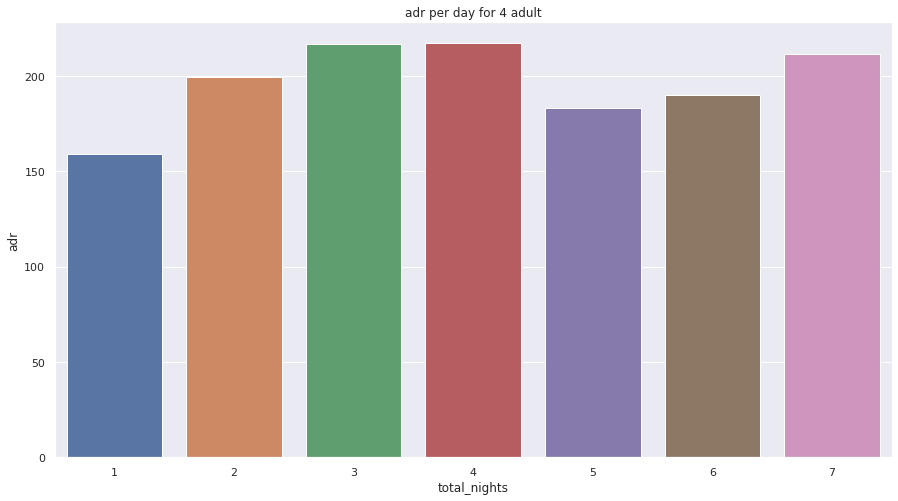

In [45]:
#having 4 adults
plt.figure(figsize=(15,8))
k=adr[(adr['adults']==4) & (adr['total_nights']!=0)]
sns.barplot(k['total_nights'],k['adr'])
plt.title('adr per day for 4 adult')

##<b>optimal length of stay in order to get the best daily rate depends on number of adults booking. If we know how many number of adults are booking we can predict best adr

##for example if we have 4 adults then optimal length to stay whould be 1 night or 5 nightss

# **Meals**
Type of meal booked. 
Undefined/SC – no meal package

BB – Bed & Breakfast

HB – Half board (breakfast and one other meal – usually dinner)

FB – Full board (breakfast, lunch and dinner)

In [46]:
df.meal.value_counts(normalize=False)

BB           67978
SC            9481
HB            9085
Undefined      492
FB             360
Name: meal, dtype: int64

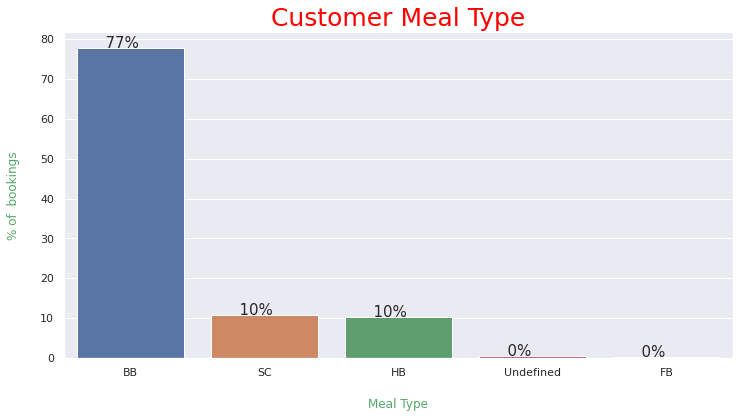

In [47]:
meal = df['meal'].value_counts()/len(df['meal'])*100
meal  = meal.rename_axis('Meal_type').reset_index(name='Percentage')

plt.figure(figsize=(12,6))
ax = sns.barplot(x='Meal_type', y='Percentage', data= meal)
plt.title('Customer Meal Type',color='red',fontsize=25)
plt.xlabel("Meal Type", labelpad=20,color='g')
plt.ylabel("% of  bookings", labelpad=20,color='g');
for p in ax.patches:
  ax.text(p.get_x(),p.get_height(), f"      {int(p.get_height())}% ", fontsize=15)

The Bed & Breakfast option is the most popular, with a frequency of 77.84%.

# **deposit types**

In [48]:
df.deposit_type.value_counts(normalize=False)

No Deposit    86251
Non Refund     1038
Refundable      107
Name: deposit_type, dtype: int64

Text(0, 0.5, 'Count')

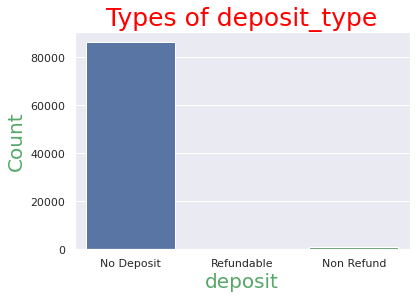

In [49]:
sns.countplot(data = df, x = 'deposit_type').set_title('Types of deposit_type', fontsize = 25,color='red')
plt.xlabel('deposit',color='g',fontsize=20)
plt.ylabel('Count',color='g',fontsize=20)

Majority of the booking does not require deposit. That could explain why cancellation rate was actually 50% of non-cancellation rate

# **Reserved Room type**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

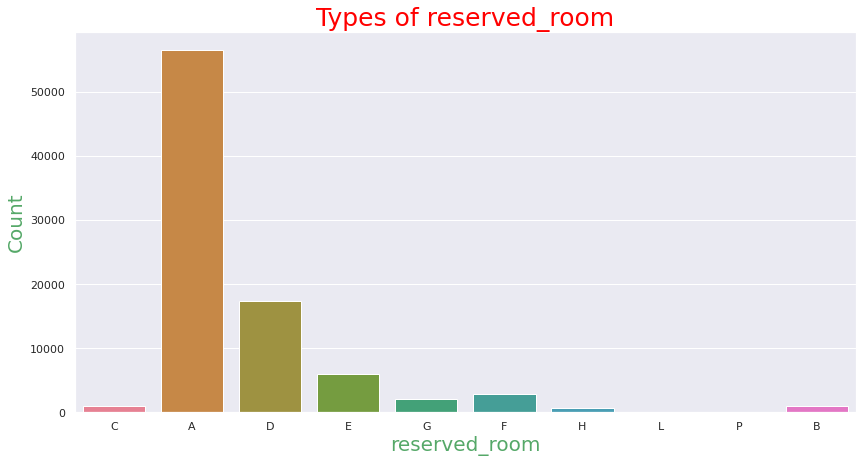

In [50]:
plt.figure(figsize=(14,7))
sns.countplot(df['reserved_room_type'], palette='husl').set_title('Types of reserved_room', fontsize = 25,color='red')
plt.xlabel('reserved_room',color='g',fontsize=20)
plt.ylabel('Count',color='g',fontsize=20)

The “A” room type is the most popular among the clientsof the reservations.

# **What are the Reserved room type & Assigned room type bookings.**

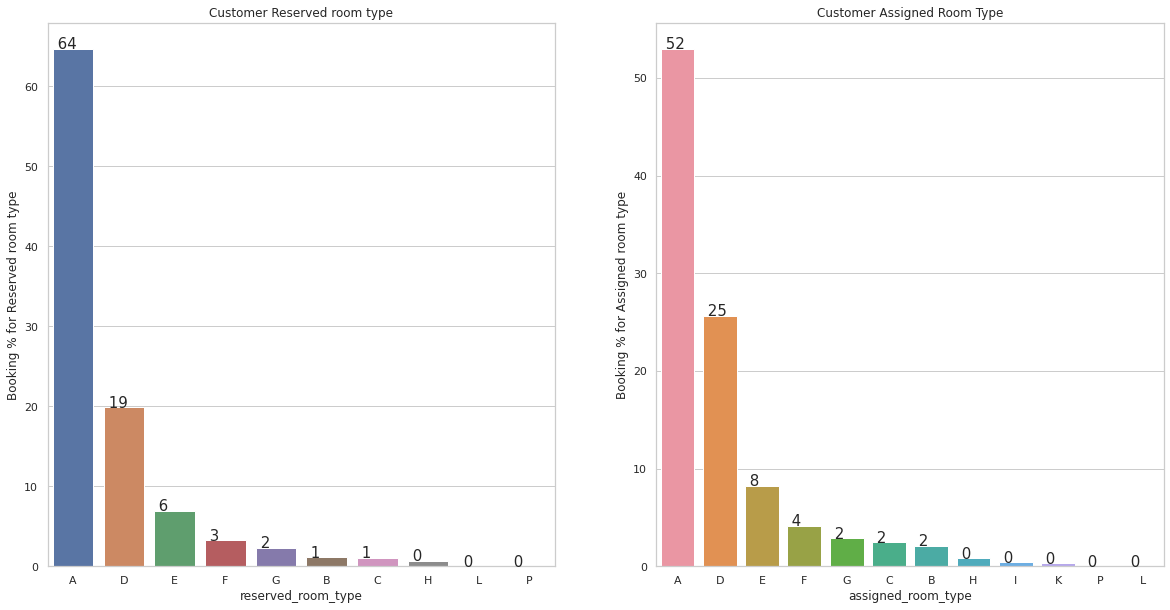

In [51]:
reserved_room = df['reserved_room_type'].value_counts(normalize=True).rename_axis('reserved_room_type').reset_index(name='Booking % for Reserved room type')
reserved_room["Booking % for Reserved room type"] = reserved_room["Booking % for Reserved room type"]*100

assigned_room = df['assigned_room_type'].value_counts(normalize=True).rename_axis('assigned_room_type').reset_index(name='Booking % for Assigned room type')
assigned_room["Booking % for Assigned room type"] = assigned_room["Booking % for Assigned room type"]*100

sns.set_style("whitegrid")
plt.figure(figsize=(20,10)) 

plt.subplot(1, 2, 1)
ax=sns.barplot(x='reserved_room_type', y='Booking % for Reserved room type', data= reserved_room)
plt.title('Customer Reserved room type')
for p in ax.patches:
   ax.text(p.get_x(),p.get_height(), f" {int(p.get_height())}", fontsize=15)

plt.subplot(1,2,2)
ax=sns.barplot(x='assigned_room_type', y='Booking % for Assigned room type', data= assigned_room)
plt.title('Customer Assigned Room Type')
for p in ax.patches:
   ax.text(p.get_x(),p.get_height(), f" {int(p.get_height())}", fontsize=15)

The Types of Reserved rooms are A, B, C, D, E, F, G, H, L.

Room Type A & D seems very popular among the customers.

The maximum bookings of around 66% are reserved for the room type A, followed by at 19% reserved for the room type D.

The Types of Assigned rooms are A, B, C, D, E, F, G, H, I, K.

The maximum bookings are assigned for the room type A i.e around 51% out of 66% of the reserved room type for A.

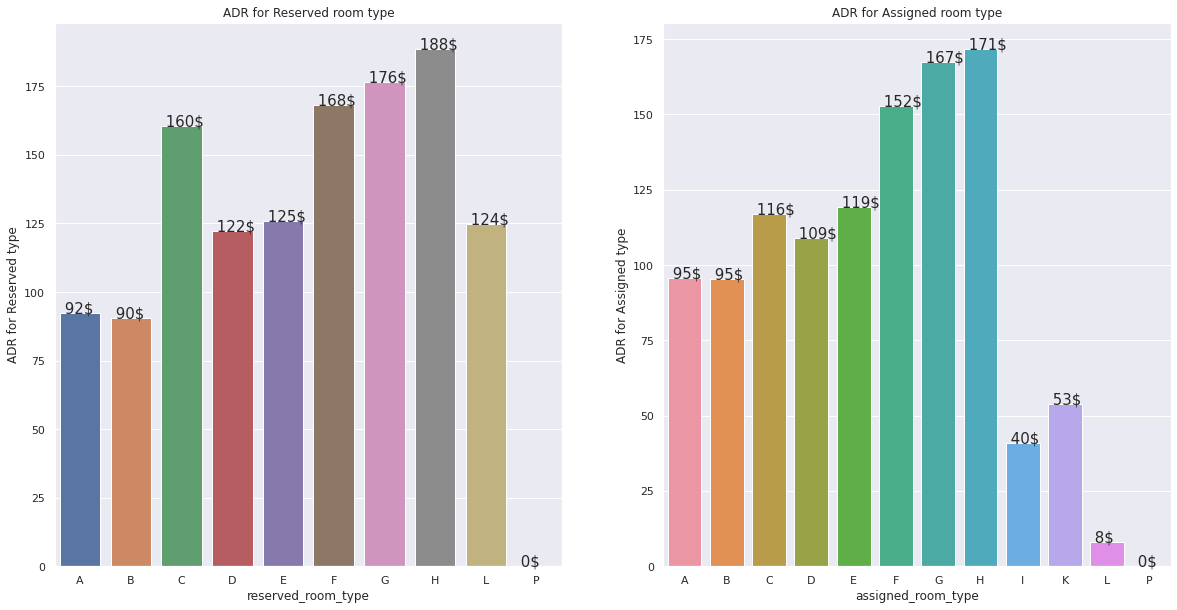

In [52]:
adr_reserved_room =  df.groupby("reserved_room_type")["adr"].mean().rename_axis('reserved_room_type').reset_index(name='ADR for Reserved type')
adr_assigned_room =  df.groupby("assigned_room_type")["adr"].mean().rename_axis('assigned_room_type').reset_index(name='ADR for Assigned type')

sns.set_style("darkgrid")
plt.figure(figsize=(20,10)) 

plt.subplot(1, 2, 1)
ax = sns.barplot(x='reserved_room_type', y='ADR for Reserved type', data= adr_reserved_room)
plt.title('ADR for Reserved room type')
for p in ax.patches:
   ax.text(p.get_x(),p.get_height(), f" {int(p.get_height())}$", fontsize=15)

plt.subplot(1, 2, 2)
ax = sns.barplot(x='assigned_room_type', y='ADR for Assigned type', data= adr_assigned_room)
plt.title('ADR for Assigned room type');
for p in ax.patches:
   ax.text(p.get_x(),p.get_height(), f" {int(p.get_height())}$", fontsize=15)

ADR is highest for Reserved room type H followed by Reserved room type G, chances are these room types are luxurious accommodation, like Deluxe room, Executive Suite, Terrace Suite, Penthouse Suite.

ADR for room type A & B are the lowest.

As Couple (or 2 adults) is the most popular accommodation type with about 65%, so my guess is Room type A & D can be Single room & Double room because these are most booked room types in hotel industry.

Some room types determined by bed availability as

Queen-sized bed, King-sized bed, a room with two twin-sized beds.

Also the adr corresponding to the room type A & D are among the lowest.

# **Overview of repeated guests**

In [53]:
df.is_repeated_guest.value_counts(normalize=False)

0    83981
1     3415
Name: is_repeated_guest, dtype: int64

Text(0.5, 1.0, 'Proportion of Repeated Guests')

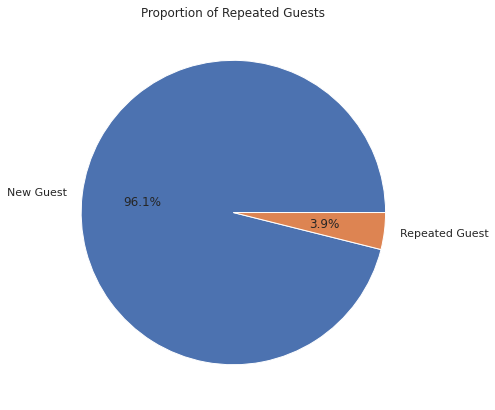

In [54]:
plt.figure(figsize=(10,7))
plt.pie(df["is_repeated_guest"].value_counts(), labels=["New Guest","Repeated Guest"],autopct='%1.1f%%')
plt.title ("Proportion of Repeated Guests")

In [57]:
repeated_guest=df.groupby('hotel')['is_repeated_guest'].value_counts()
repeated_guest

hotel         is_repeated_guest
City Hotel    0                    51720
              1                     1708
Resort Hotel  0                    32261
              1                     1707
Name: is_repeated_guest, dtype: int64

In [58]:
repeated_guest=pd.DataFrame(repeated_guest)

In [63]:
repeated_guest=repeated_guest.rename(columns={'is_repeated_guest':'numbers'})

In [65]:
repeated_guest.reset_index(inplace=True)

In [66]:
repeated_guest

,hotel,is_repeated_guest,numbers
0,City Hotel,0,51720
1,City Hotel,1,1708
2,Resort Hotel,0,32261
3,Resort Hotel,1,1707


In [69]:
repeated_guest['hotel']

0      City Hotel
1      City Hotel
2    Resort Hotel
3    Resort Hotel
Name: hotel, dtype: object

Text(0.5, 1.0, 'Percentage repeated guists for Resort Hotel')

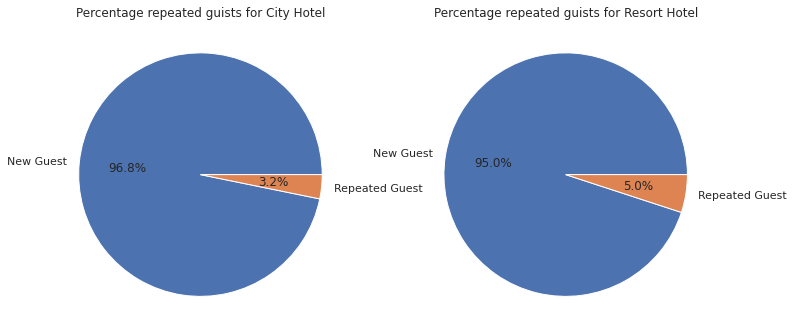

In [80]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.pie(repeated_guest[repeated_guest['hotel']=='City Hotel']['numbers'],autopct='%1.1f%%',labels=["New Guest","Repeated Guest"])
plt.title('Percentage repeated guists for City Hotel')
plt.subplot(1,2,2)
plt.pie(repeated_guest[repeated_guest['hotel']=='Resort Hotel']['numbers'],autopct='%1.1f%%',labels=["New Guest","Repeated Guest"])
plt.title('Percentage repeated guists for Resort Hotel')


The percentage of repeated guests for Resort Hotel is higher than City Hotel

### **Looking at types of guests**

*italicized text*

Type of booking, assuming one of four categories:

Contract — when the booking has an allotment or other type of contract associated to it;

Group — when the booking is associated to a group;

Transient — when the booking is not part of a group or contract, and is not associated to other transient booking;

Transient-party — when the booking is transient, but is associated to at least other transient booking

Text(0.5, 1.0, 'Total guests for each hotel\nGrouped by customer type')

<Figure size 576x360 with 0 Axes>

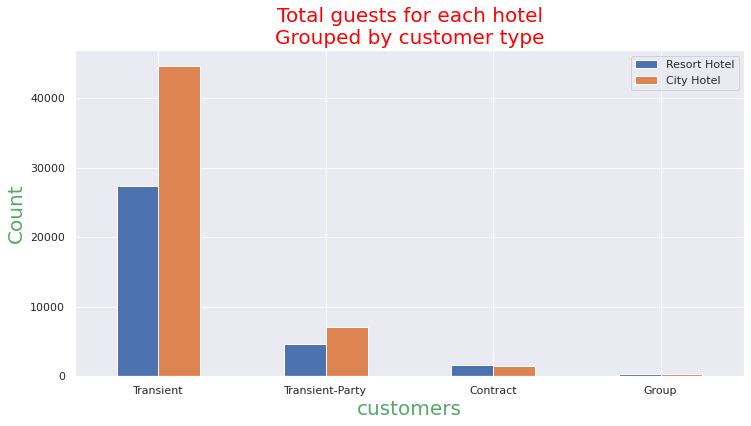

In [84]:
plt.figure(figsize=(8,5))
temp = pd.DataFrame(index= df.groupby('customer_type').sum().index)

for hotel in df['hotel'].unique():
  temp[hotel] = df[df['hotel']==hotel]['customer_type'].value_counts()
    
temp = temp.sort_values('City Hotel',ascending=False)
sns.set(font_scale=1)
temp.plot(kind="bar", figsize=( 12,6), rot=0)
plt.xlabel('customers',color='g',fontsize=20)
plt.ylabel('Count',color='g',fontsize=20)
plt.title("Total guests for each hotel\nGrouped by customer type",color='red',fontsize=20)

Majority of the bookings are transient. This means that the booking is not part of a group or contract. With the ease of booking directly from the website, most people tend to skip the middleman to ensure quick response from their booking.Trasients are the most common customer type, they represent 79.40% of the total customers.

## **Car Parking Spaces**

In [85]:
df.required_car_parking_spaces.value_counts(normalize=False)

0    80083
1     7280
2       28
3        3
8        2
Name: required_car_parking_spaces, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


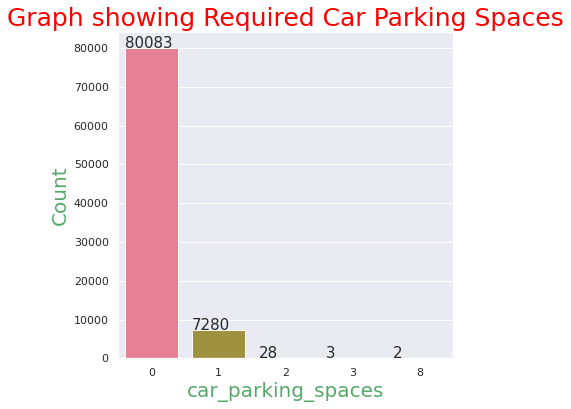

In [87]:
plt.figure(figsize=(6,6))
ax=sns.countplot(df['required_car_parking_spaces'], palette='husl')
ax.set_title('Graph showing Required Car Parking Spaces', fontsize = 25,color='red')
plt.xlabel('car_parking_spaces',color='g',fontsize=20)
plt.ylabel('Count',color='g',fontsize=20)
for p in ax.patches:
  ax.text(p.get_x(),p.get_height(), f"{int(p.get_height())}", fontsize=15)

Less percentage of customers requires car parking space

# **Relation between Lead Time & Cancelation Rate?**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'total numbers')

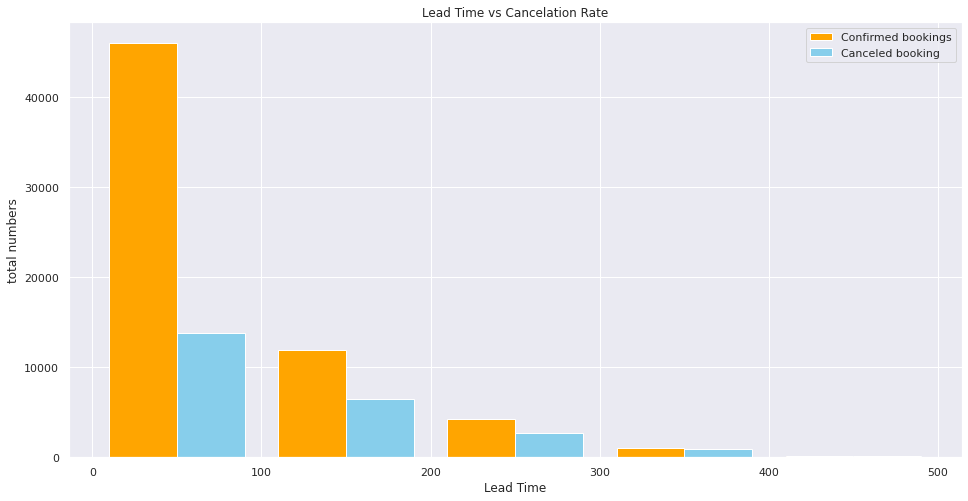

In [99]:
fig, plot = plt.subplots(figsize=(16,8))
plt.title("Lead Time vs Cancelation Rate")
plt.hist([df[df['is_canceled']==0]['lead_time'], df[df['is_canceled']==1]['lead_time']], color = ["orange","skyblue"], bins= np.arange(0, 600,100))
plt.legend(["Confirmed bookings", "Canceled booking"])
plt.xlabel('Lead Time')
plt.ylabel('total numbers')

In [100]:
cut_bins = [0, 100,200,300,400,500,600]
temp3 = pd.cut(df[df['is_canceled']==1]["lead_time"],bins= cut_bins).value_counts().rename_axis('Lead Time').reset_index(name='Canceled count')

cut_bins = [0, 100,200,300,400,500,600]
temp4 = pd.cut(df[df['is_canceled']==0]["lead_time"],bins= cut_bins).value_counts().rename_axis('Lead Time').reset_index(name='Not Canceled count')

merged_df1 = pd.merge(temp3, temp4, how= "inner", on="Lead Time") 
merged_df1["Cancelation Rate"] =  merged_df1["Canceled count"]/merged_df1["Not Canceled count"] 
merged_df1

,Lead Time,Canceled count,Not Canceled count,Cancelation Rate
0,"(0, 100]",13533,40513,0.334041
1,"(100, 200]",6440,11785,0.546457
2,"(200, 300]",2644,4217,0.626986
3,"(300, 400]",894,1050,0.851429
4,"(400, 500]",115,151,0.761589
5,"(500, 600]",34,28,1.214286


Text(0.5, 1.0, 'Lead Time & Cancelation Rate')

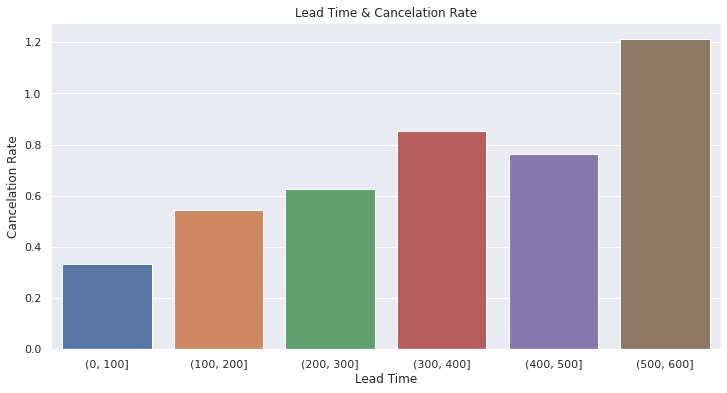

In [101]:
plt.subplots(figsize=(12,6))
ax=sns.barplot(x = "Lead Time", y = "Cancelation Rate", data= merged_df1)
ax.set_title('Lead Time & Cancelation Rate')

It is clear that the percentage of cancellation increases as lead time increases.

We can clearly make the inference that Cancellation rate is directly proportional to the Lead time i.e as the Lead time increases the cancellation rate also increases.

## **Relation between days on waiting list and market segments**

Text(0, 0.5, 'days on waiting list')

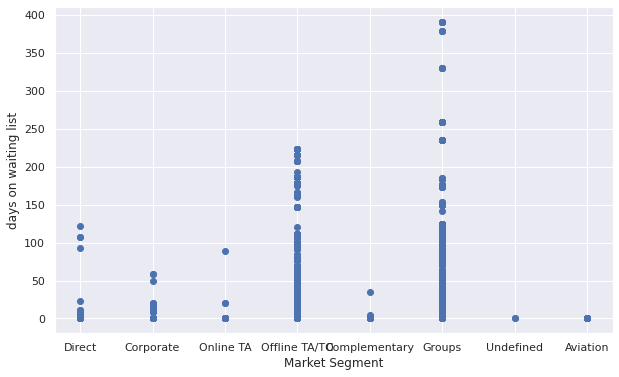

In [102]:
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(df['market_segment'], df['days_in_waiting_list'])
ax.set_xlabel('Market Segment')
ax.set_ylabel('days on waiting list')

Aviation industry has the minimum number of days on waiting list. The reason for this might be that when the flight has to land at a location it shoulds provide immidiate accomodation to all of his working staff(like pilot, cabincrew), etc) . So they don't entertain hotels which put them on waiting list for too long. In general hotel mangement sees that they make arrngement immediatelty and provide rooms to them with almost zero waiting list.


# **which countries are the visitors from**

In [103]:
df.country.value_counts(normalize=False)[:10]

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
ITA     3066
IRL     3016
BEL     2081
BRA     1995
NLD     1911
Name: country, dtype: int64

In [106]:
import plotly.express as px
visitors_from_diffrent_countries = df.groupby(['country']).size().reset_index(name ='count')

#we will be using plotly.express to plot a chloropleth map.
px.choropleth(visitors_from_diffrent_countries, locations = "country", color ="count", hover_name = "country",
              color_continuous_scale=px.colors.sequential.Plasma, title="Home country of visitors")

In [107]:
top_10_countries=df['country'].value_counts(normalize=False)[:10]

In [108]:
top_10_countries = top_10_countries.reset_index().rename(columns = {'index':'country','country':'number_of_bookings'})
top_10_countries['percentage'] = (top_10_countries['number_of_bookings']/top_10_countries['number_of_bookings'].sum())*100

In [109]:
top_10_countries

,country,number_of_bookings,percentage
0,PRT,27453,38.432893
1,GBR,10433,14.605703
2,FRA,8837,12.371379
3,ESP,7252,10.152455
4,DEU,5387,7.541544
5,ITA,3066,4.292254
6,IRL,3016,4.222256
7,BEL,2081,2.913301
8,BRA,1995,2.792905
9,NLD,1911,2.675309


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



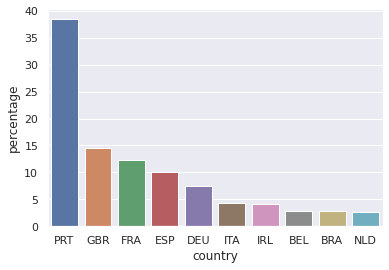

In [110]:
sns.barplot("country","percentage", data=top_10_countries)

The country PRT has highest percentage of hotel bookings

# **Bi-Variate Analysis**

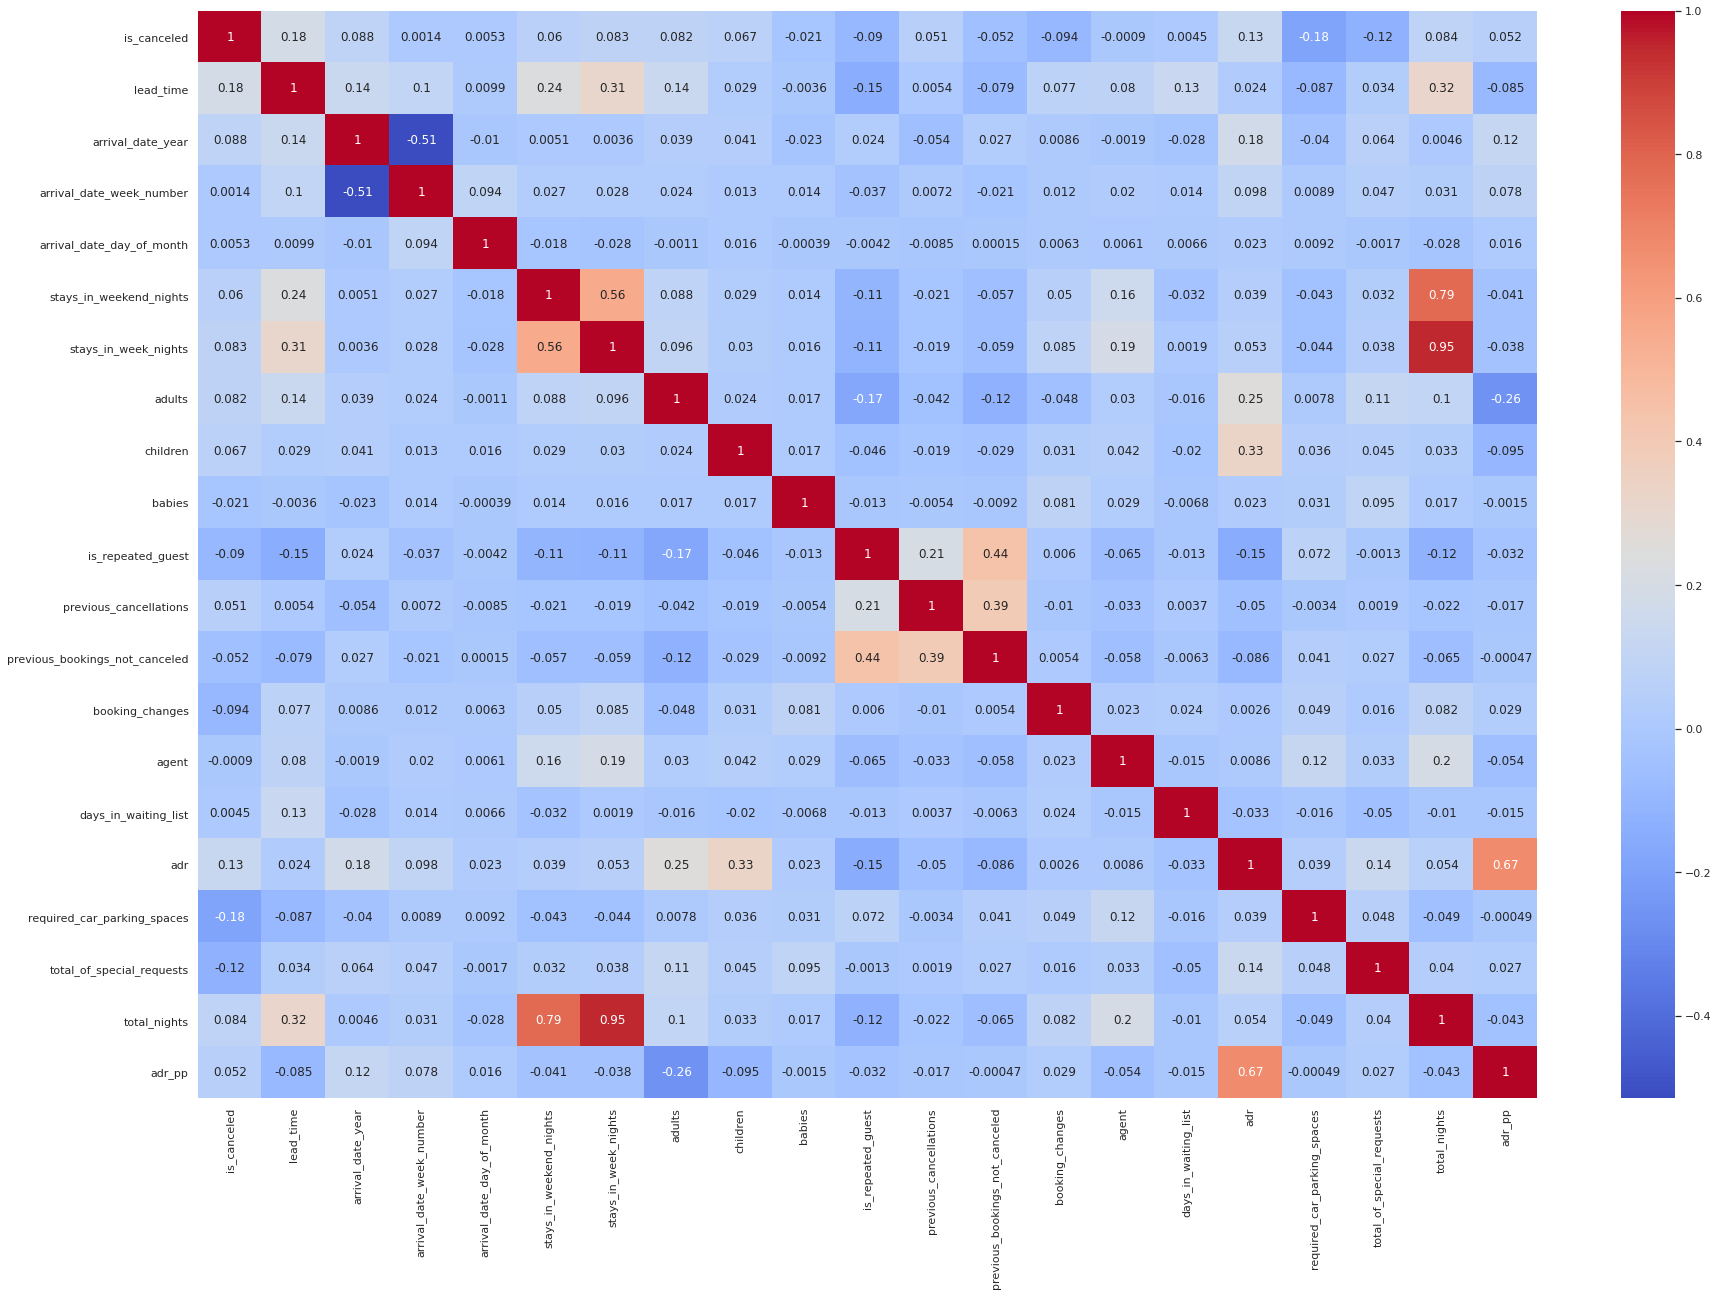

In [114]:
plt.figure(figsize=(30,20))

sns.heatmap(df.corr(),cmap='coolwarm', annot=True)

# **Inferences and Conclusion**

The majority of guests come from western europe countries.

Majority of the hotels booked are city hotel.

The number of repeated guests is too low.

City hotel has higest pecentage of cancellation rate.

We also realise that the high rate of cancellations can be due high no deposit policies.

The month of January and february has less waiting time compared to other months.

Both the hotels has high percentage of special request but the City hotel likely to receive a high number of special requests as its percentage of special requests is 71.

The optimal length of stay in order to get the best daily rate varies as the number of adults varies

we do not have repeated guests, we should target our advertisement on guests to increase returning guests.